# Importoing libraries 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

# Reading CSV File

In [9]:
df=pd.read_csv("data.csv",encoding='unicode_escape')

# Data Understanding

In [10]:
#LOADING THE DATASET
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
#df=df.loc[:,~df.columns.str.contains('^Unnamed')]
#df=df.loc[:,~df.columns.str.contains('^Status')]

In [12]:
#TO CHECK ROWS/COLUMNS--- AS WE SEE 435742(ROWS) AND 13(COLUMNS)
df.shape

(435742, 13)

In [13]:
#CHECKING OVERALL INFORMATION ON THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [14]:
#TO CHECK MISSING VALUES OF COLUMNS IN DATASET
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [15]:
#TO CHECK DESCRIPTIVE STATS OF THE NUMERIC VALUES PRESENT IN THE DATA LIKE 
#MEAN,STANDARD DEVIATION,MIN VALUES AND MAX VALUES PRESENT IN THE DATA
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [16]:
#TO CHECK THE UNIQUE VALUES PRESENT IN THE DATAFRAME
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [17]:
#TO CHECK COLUMNS PRESENT IN THE DATASET
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

# Data Visualization

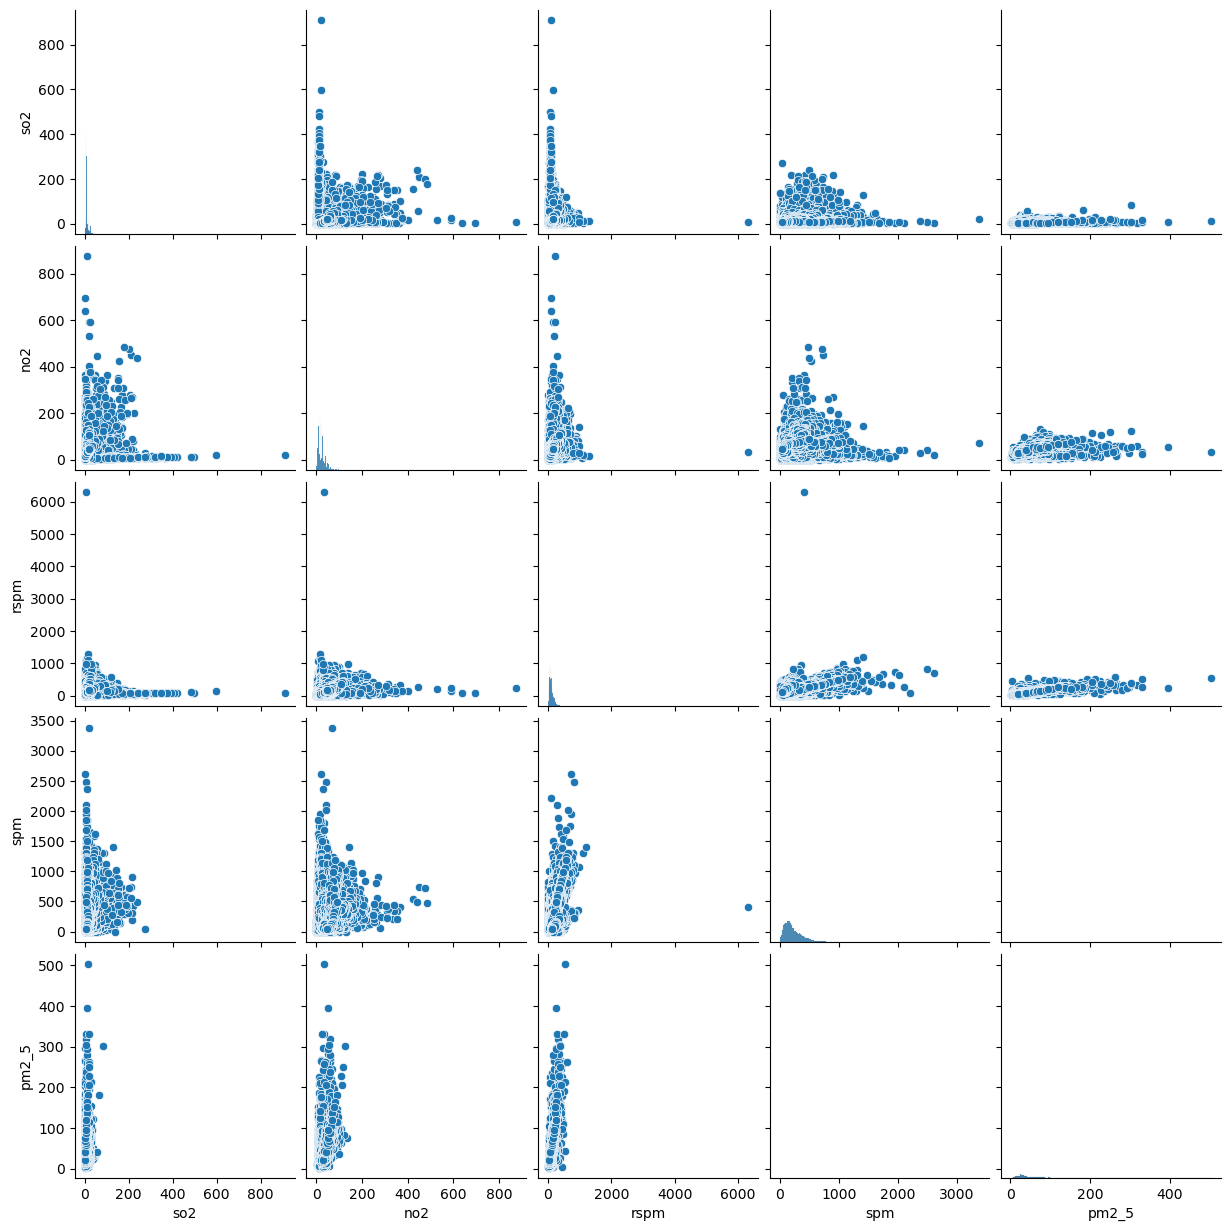

In [18]:
#pairplot show us IN scatter plot
sns.pairplot(data=df)

In [19]:
#COUNT OF VALUES PRESENT IN THE STATE COLUMN
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

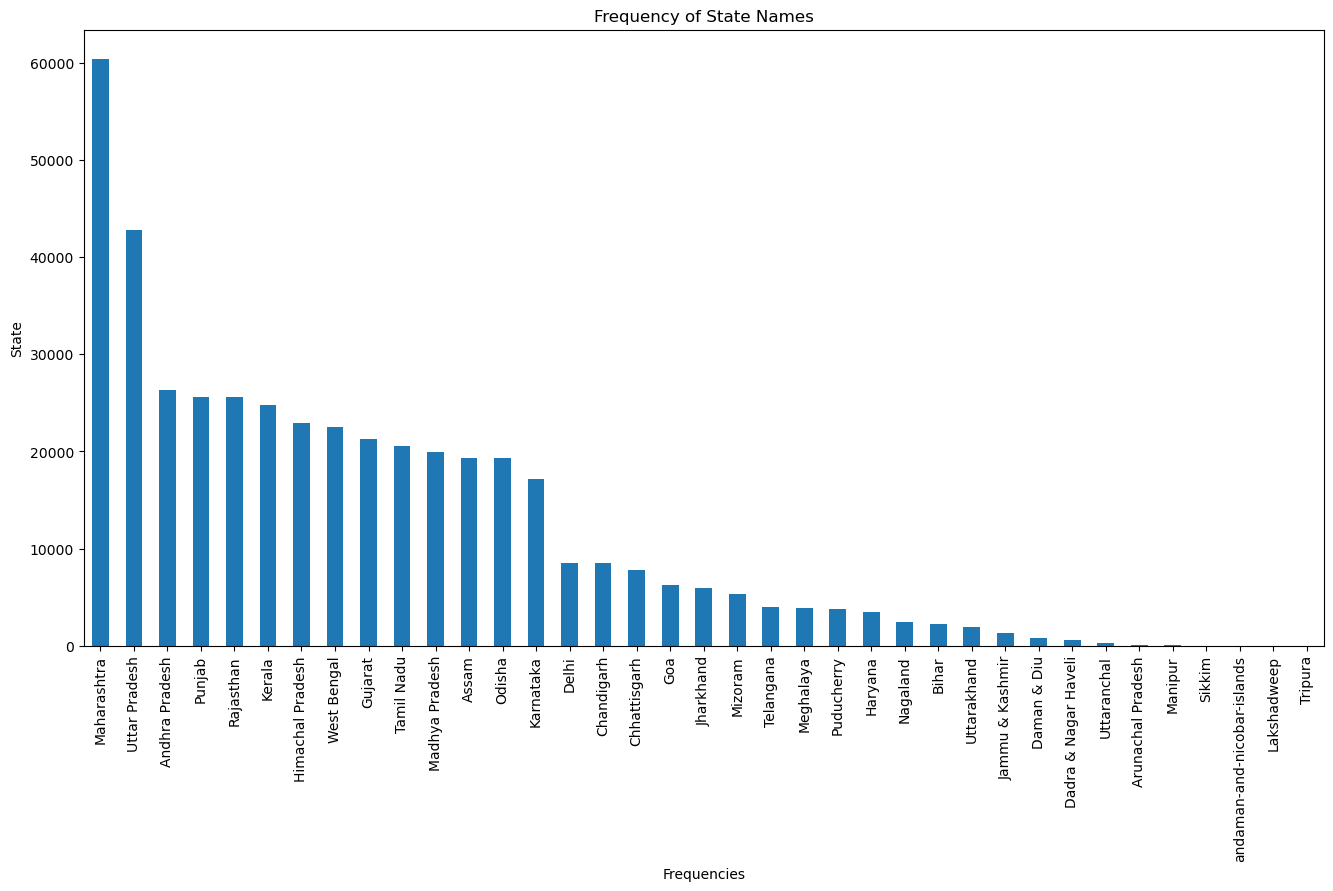

In [20]:
#SHOWS US COUNT OF STATE PRESENT IN THE DATASET
state_counts = df['state'].value_counts()
plt.figure(figsize=(16, 8))
state_counts.plot(kind='bar')
plt.xlabel('Frequencies')
plt.ylabel('State')
plt.title('Frequency of State Names')
plt.show()


In [21]:
#COUNT OF VALUES PRESENT IN THE type COLUMN
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

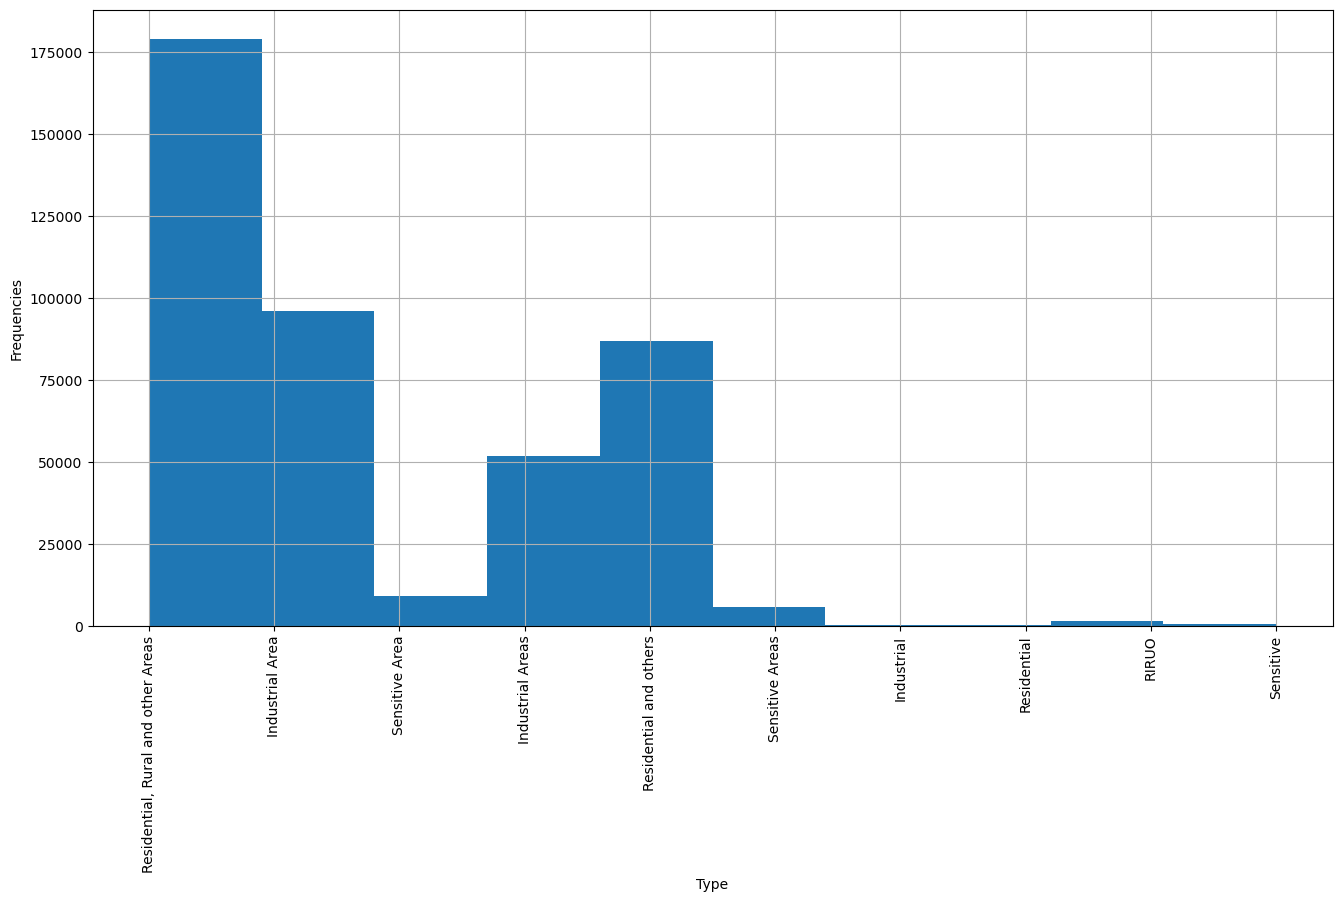

In [22]:
#COUNT OF TYPES PRESENT IN THE DATASET
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.show()

In [23]:
#COUNTS OF VALUES PRESENT IN THE AGENCY COLUMN
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

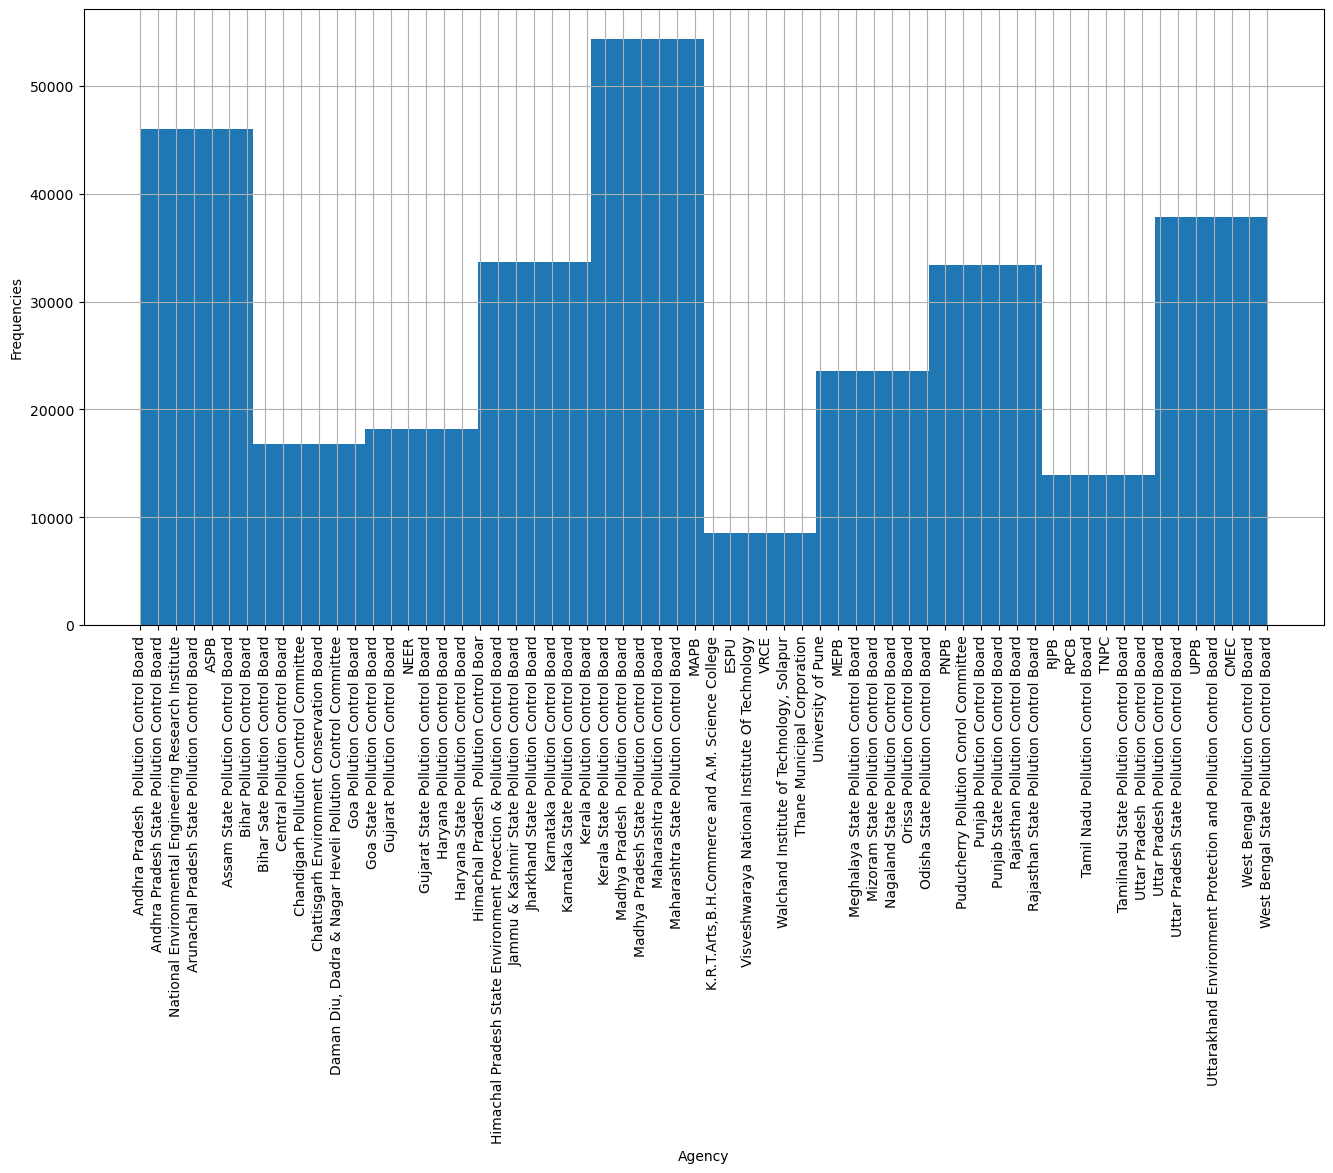

In [24]:
#PLOTING COUNT OF AGENCY PRESENT IN DATASET
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.show()

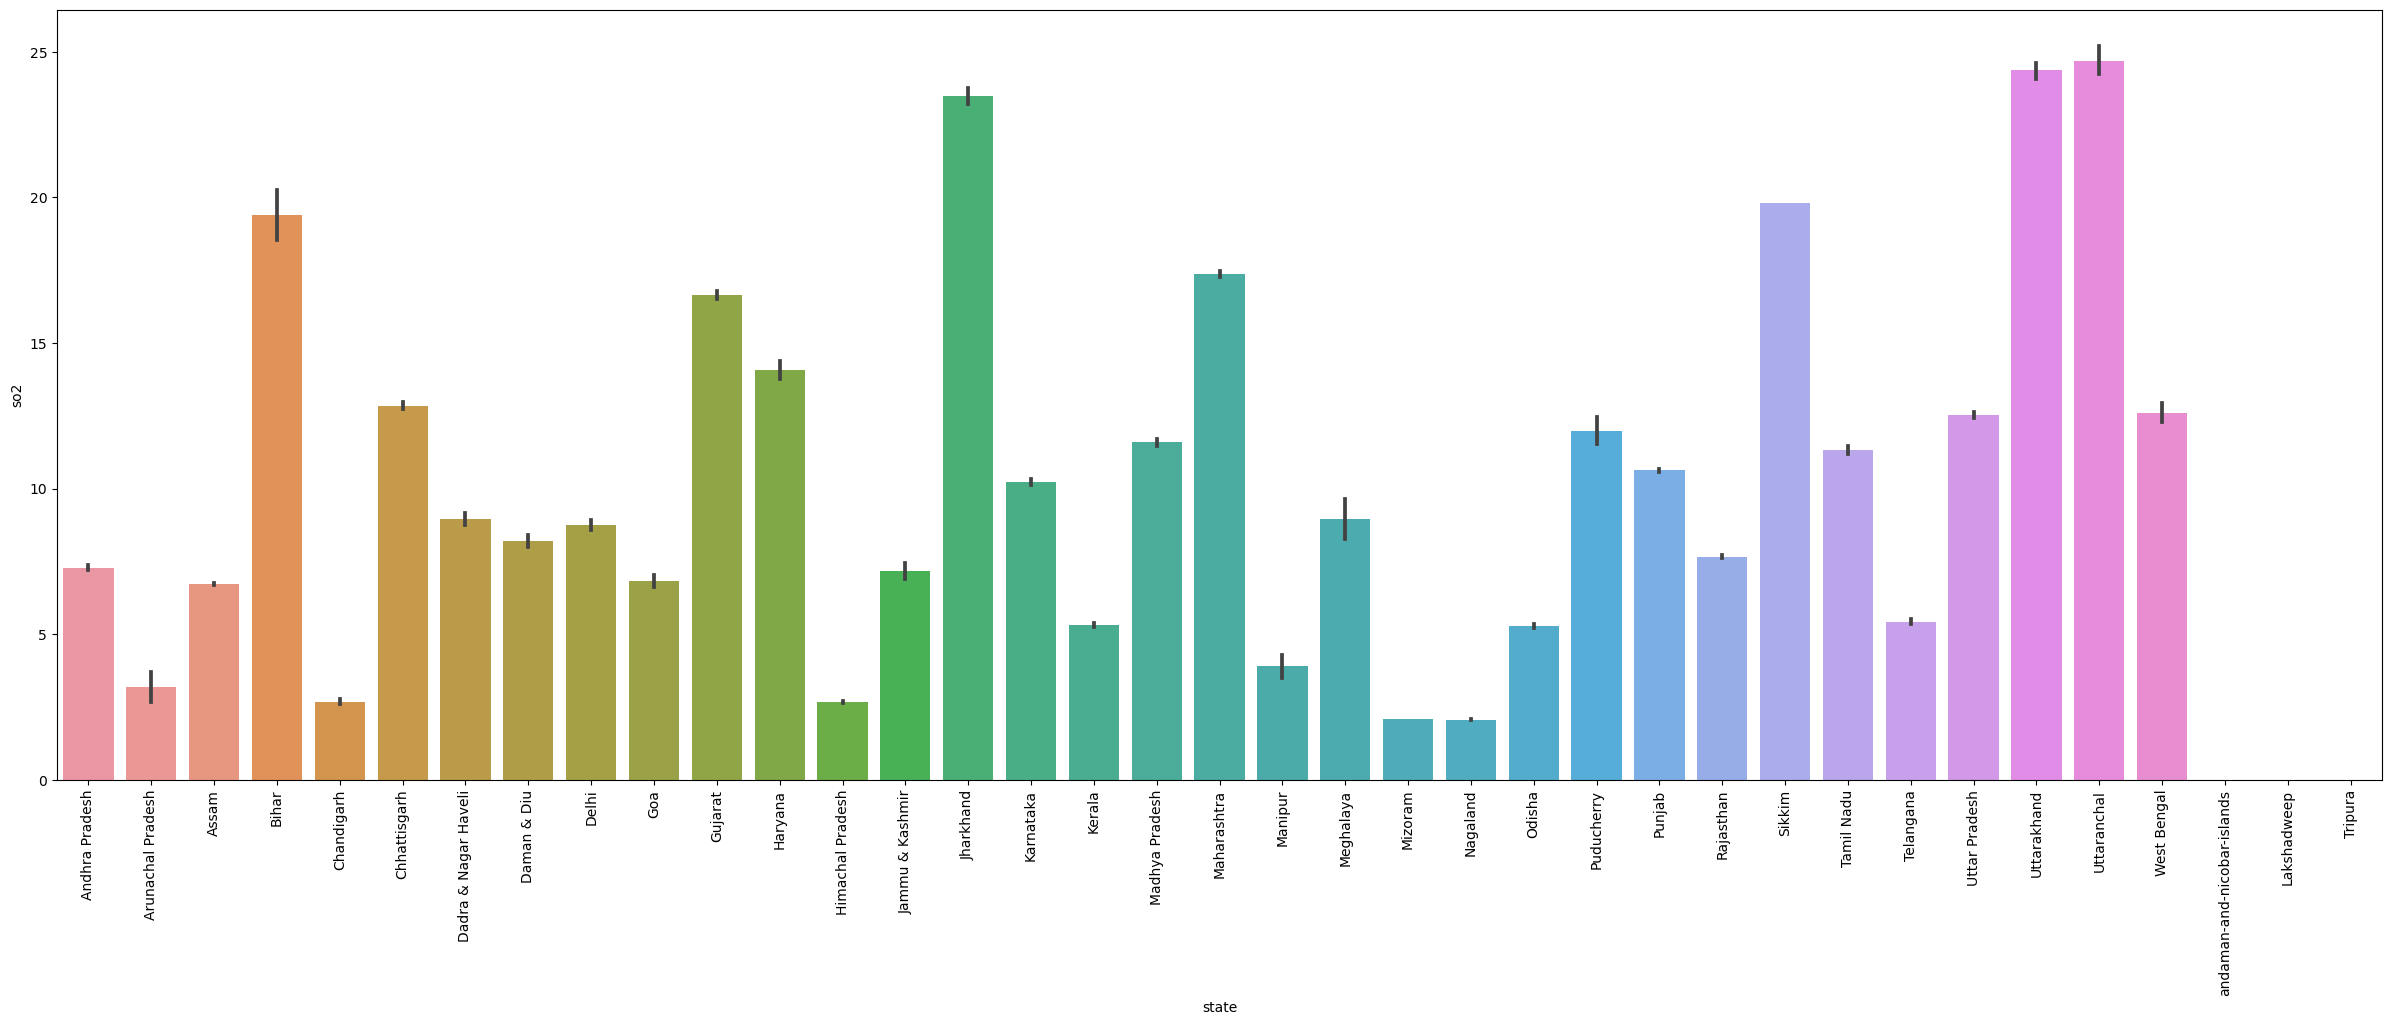

In [25]:
#TO SHOW NAME OF STATE HAVING  HIGHER So2 LEVELS IN THE AIR WHICH IS UTTRANCHAL FOLLOWED BY UTTRAKHAND
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)
plt.show()

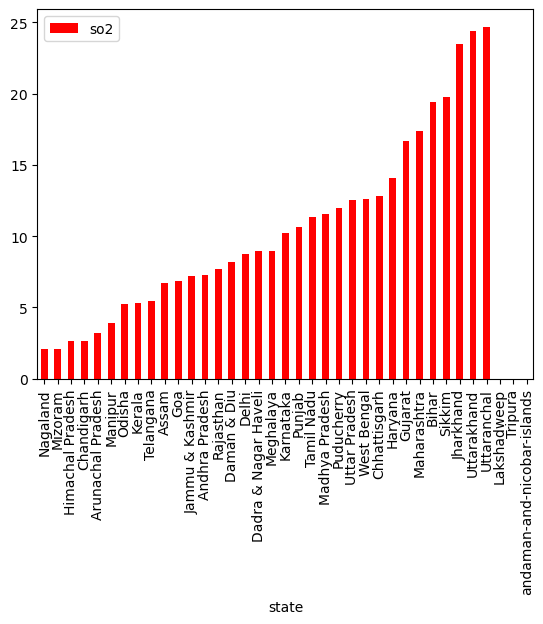

In [26]:
#SHOWING THE INCREASING ORDER OF THE STATE ON THEIR So2 LEVEL
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='red')
plt.show()

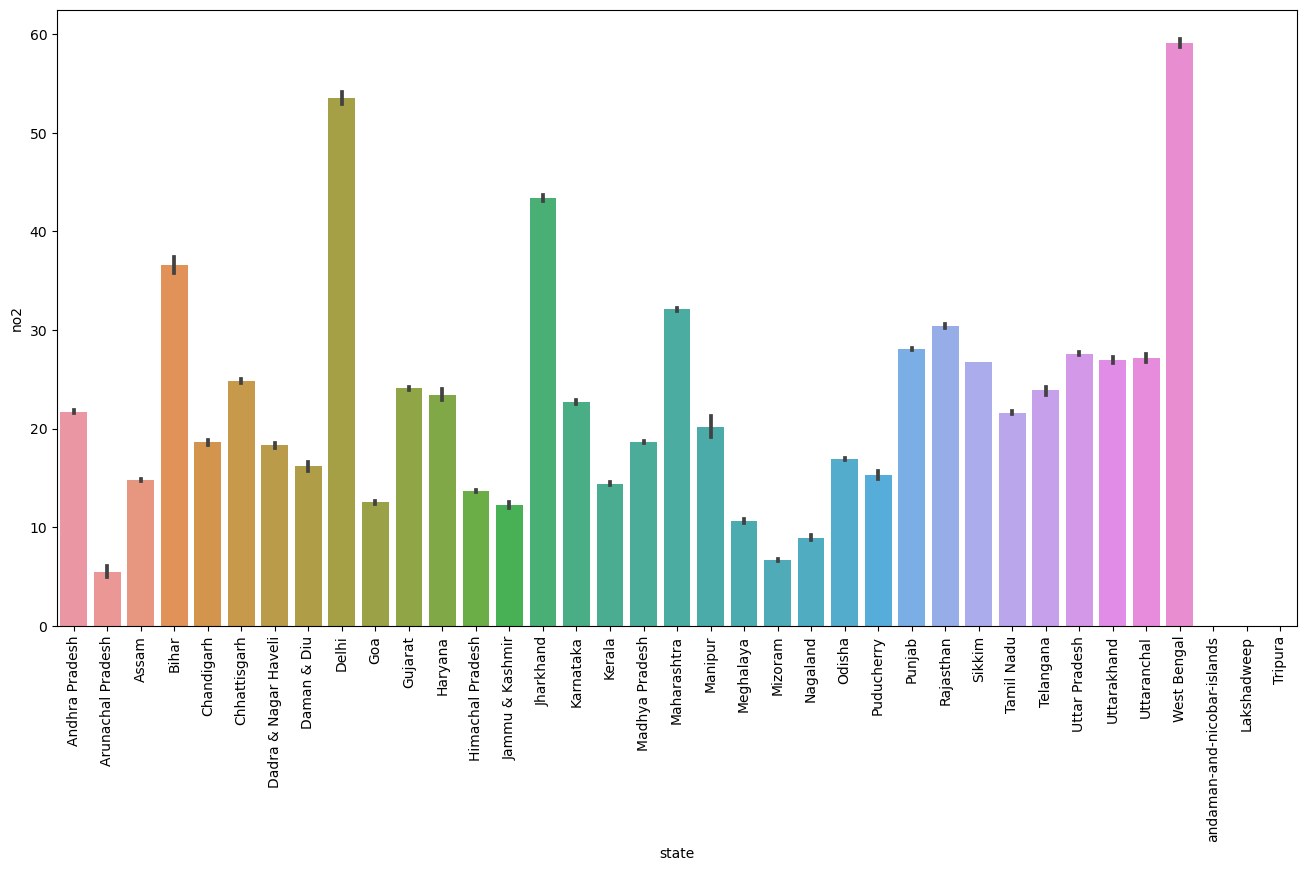

In [27]:
##TO SHOW NAME OF STATE HAVING  HIGHER No2 LEVELS IN THE AIR WHICH IS WEST BENGAL
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)
plt.show()

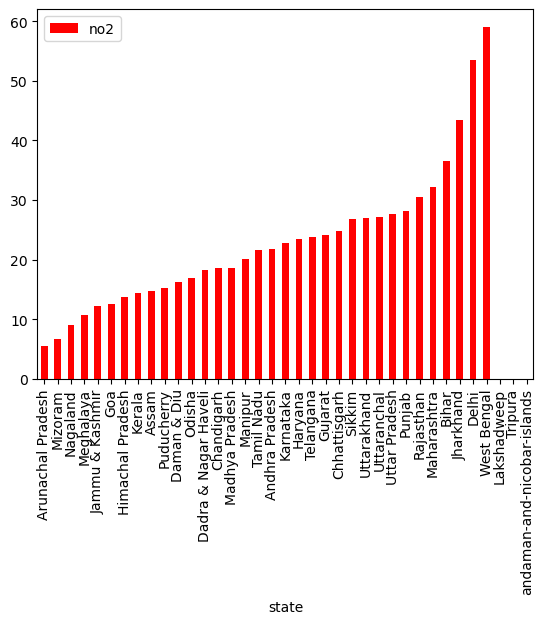

In [28]:
#SHOWING THE INCREASING ORDER OF THE STATE ON THEIR No2 LEVEL
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='red')
plt.show()

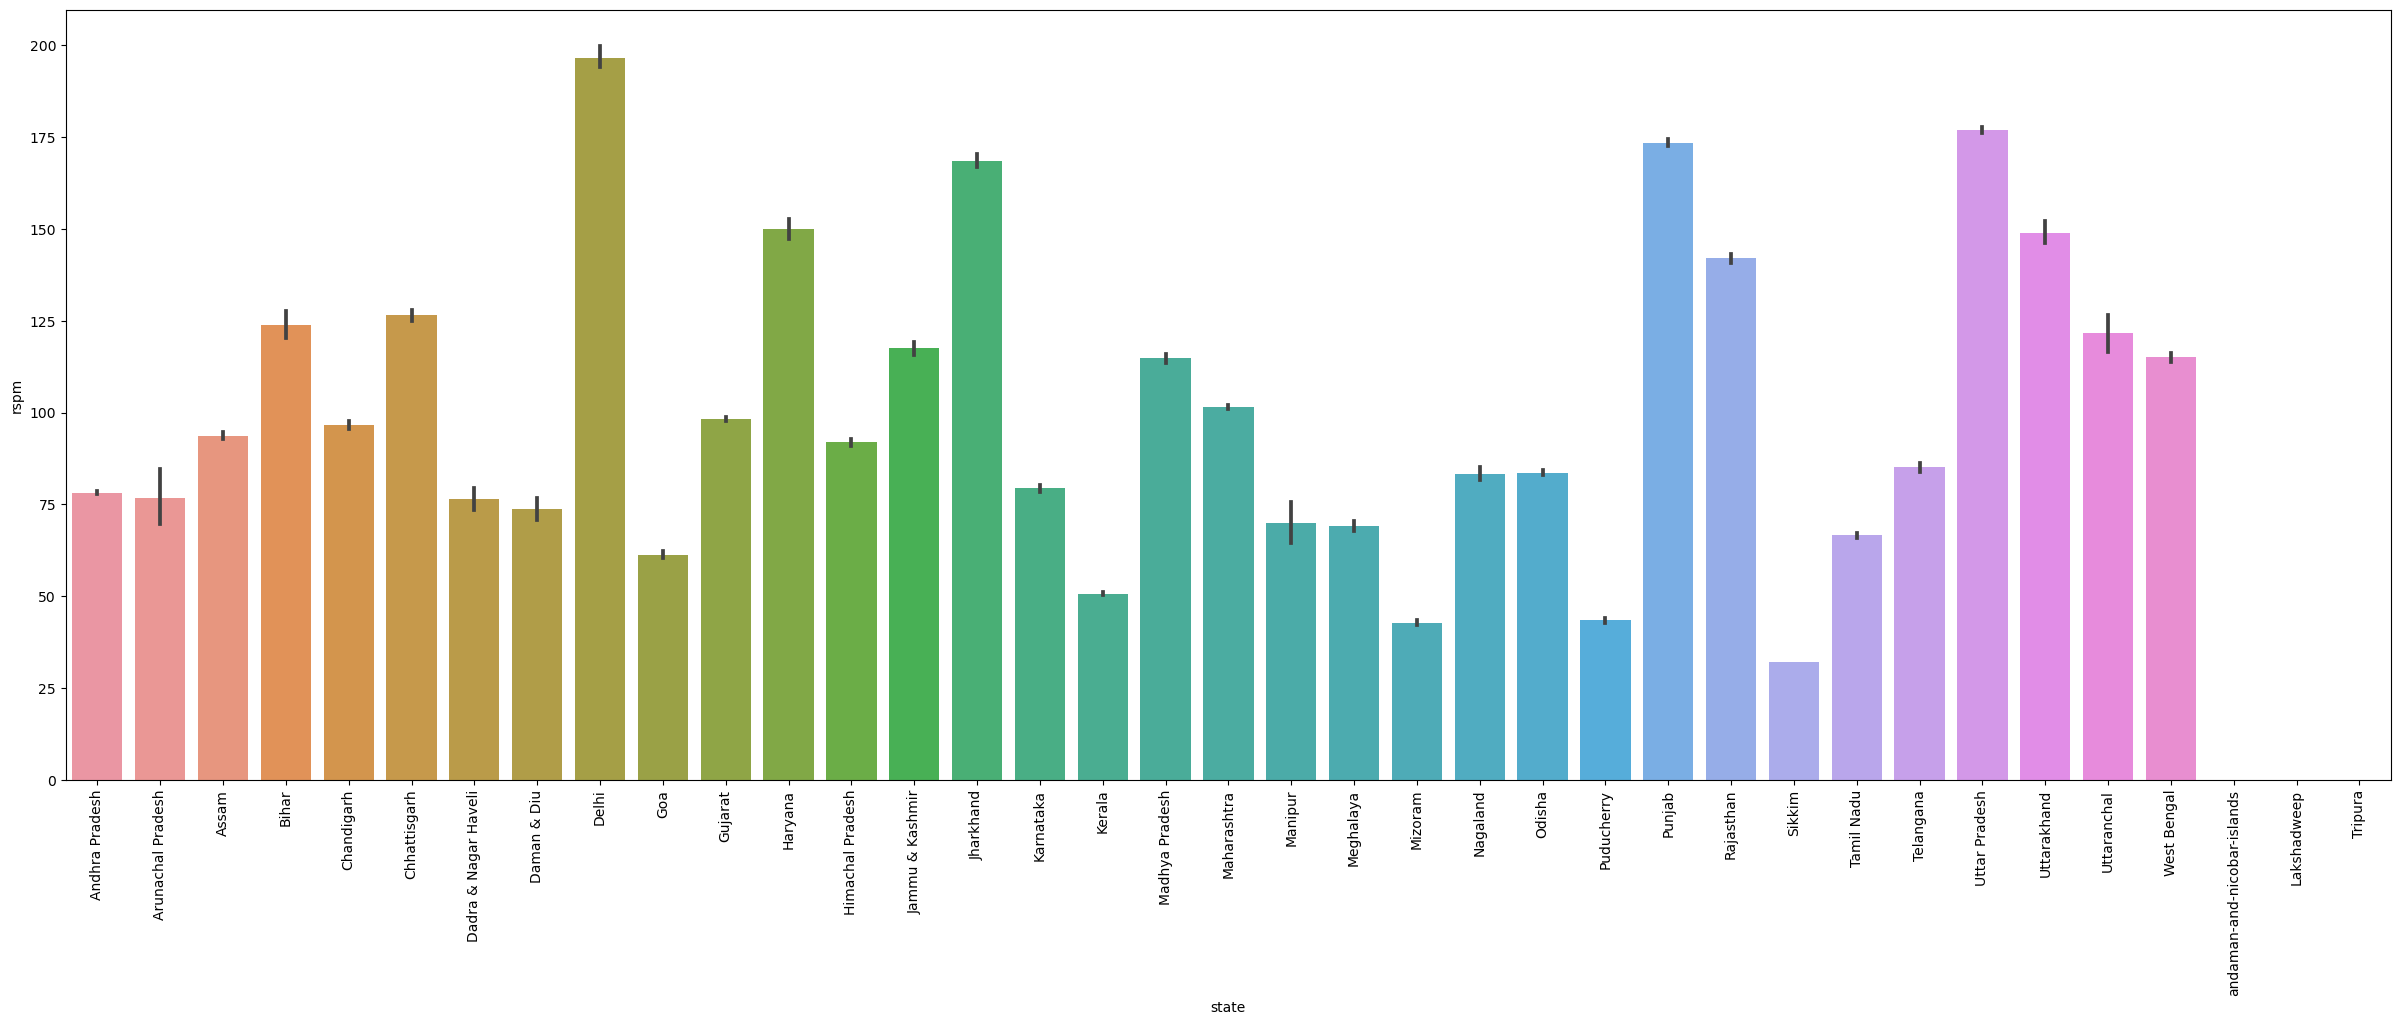

In [29]:
#DELHI HAS HIGHER RSPM LEVEL COMPARED TO OTHERS STATES
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)
plt.show()

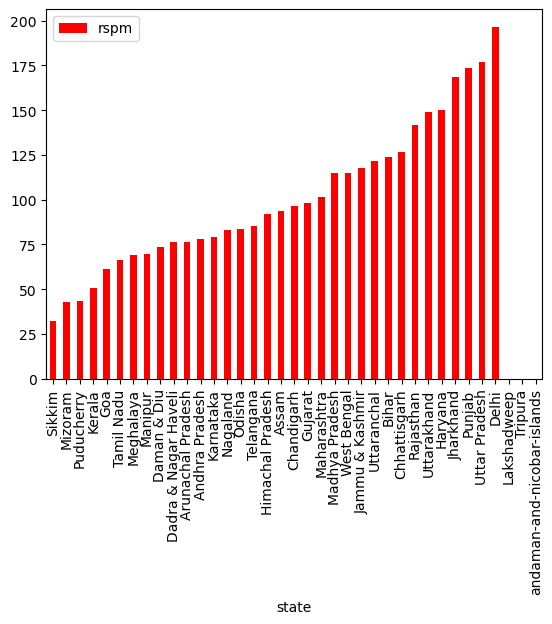

In [30]:
#SHOWING THE INCREASING ORDER OF THE STATE ON THEIR RSPM LEVEL
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='red')
plt.show()

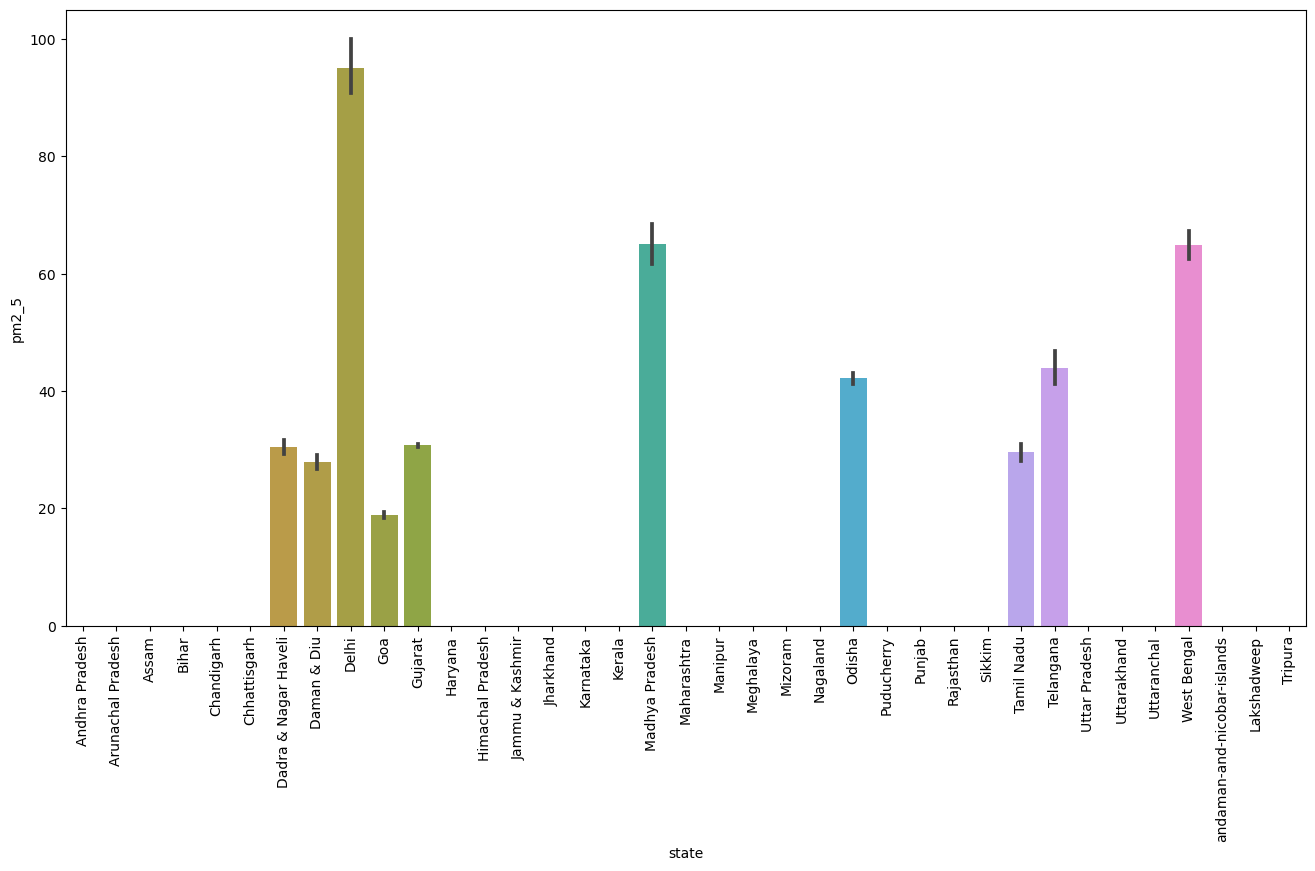

In [31]:
#DELHI HAS HIGHER PM2_5 LEVEL COMPARED TO OTHER STATES
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df)
plt.show()

## Checking all the null values and treating those null values

In [32]:
#CHECKING ALL NULL VALUES
nullvalues=df.isnull().sum().sort_values(ascending=False)

In [33]:
#HIGHER NULL VALUES PRESENT IN PM2_5 AND SPM
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [34]:
#COUNT(RETURNS NON-NAN VALUE)
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [35]:
#CONCATENATING TOTAL NULL VALUES AND THEIR PERCENTAGE OF MISSING VALUES FOR FURTHER IMPUTATION OR COLUMN DELETION
missing_data_with_percentage=pd.concat([nullvalues,null_values_percentage],axis=1,keys=['Total','Percent'])

In [36]:
#PERCENTAGES OF NULL VALUES PRESENT IN THE DATASET
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [37]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [38]:
#DROPPING UNNECESSARY COLUMNS
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
df.drop(['pm2_5'],axis=1,inplace=True)


In [39]:
#NOW CHECKING THE NULL VALUES 
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
dtype: int64

In [40]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm'], dtype='object')

In [41]:
df

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN
...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [43]:
df.fillna(0,inplace=True)

In [44]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm'], dtype='object')

In [45]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
dtype: int64

In [46]:
df

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0
...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0


In [47]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm'], dtype='object')

# CALCULATE AIR QUALITY INDEX FOR S02 BASED ON FORMULA
#### The air quality index is a piecewise linear function of the pollutant concentration, At the boundary between AQI categories,there is a discontinuos jump of one AQI unit. To Convert from concentration to AQI this equation is used



In [48]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)

    elif (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)

    elif (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)

    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)

    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)

    elif (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si


df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head(10)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875
5,6.4,8.000
6,5.4,6.750
7,4.7,5.875
8,4.2,5.250
9,4.0,5.000


In [49]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [50]:
#sub-index of RSPM -(respirable suspended particualte matter concentration)
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
df['RSPMi']=df['rspm'].apply(cal_RSPMi)
data= df[['rspm','RSPMi']]
data.head(10)

,rspm,RSPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [51]:
#sub-index of SPM - suspended particulate matter
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [52]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'SOi', 'Noi',
       'RSPMi', 'SPMi'],
      dtype='object')

In [53]:
# calculate aqi 
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    elif(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    elif(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    elif(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','RSPMi','SPMi','AQI']]
data.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [54]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Satisfactory"
    elif x>100 and x<=200:
        return "Moderate"
    elif x>200 and x<=300:
        return "Poor"
    elif x>300 and x<=400:
        return "Very Poor"
    else:
        return "Severe"

df['AQI_Range'] = df['AQI'].apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,SOi,Noi,RSPMi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [55]:
df['AQI_Range'].value_counts()

Moderate        140316
Satisfactory    128587
Good            100583
Poor             31733
Severe           18700
Very Poor        15823
Name: AQI_Range, dtype: int64

In [56]:
#SOi	Noi	RSPMi	SPMi	PMi	AQI	AQI_Range

# Applying Machine Learning
### Splitting the dataset into Dependent and independent columns

In [57]:
x=df[['SOi','Noi','RSPMi','SPMi']]
y=df['AQI']
x.head()

,SOi,Noi,RSPMi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [58]:
y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [59]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


# Linear Regression

In [60]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [61]:
#predicting_train
train_pred=model.predict(x_train)
#predicting on test
test_pred=model.predict(x_test)

In [62]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))

print('-'*50)

print('RSquared value on train:',model.score(x_train,y_train))
print('RSquared value on test:',model.score(x_test,y_test))

RMSE TrainingData =  31.606003012819144
RMSE TestData =  31.587101848305814
--------------------------------------------------
RSquared value on train: 0.9020692997935535
RSquared value on test: 0.9020524626769799


# Decision Tree Regressor

In [63]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
#predicting train
train_preds=DT.predict(x_train)
#predicting on test
test_preds=DT.predict(x_test)

In [65]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))

print('-'*50)

print('RSquared value on train:',DT.score(x_train,y_train))
print('RSquared value on test:',DT.score(x_test,y_test))

RMSE TrainingData =  31.606003012819144
RMSE TestData =  31.587101848305814
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9997097187004987


# Random Forest Regressor

In [66]:
RF=RandomForestRegressor().fit(x_train,y_train)

In [67]:
#predicting_train
train_preds1=RF.predict(x_train)
#predicting om test
test_preds1=RF.predict(x_test)

In [68]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))

print('-'*50)

print('RSquared value on train:',RF.score(x_train,y_train))
print('RSquared value on test:',RF.score(x_test,y_test))

RMSE TrainingData =  0.5607696826550453
RMSE TestData =  1.4158805714101732
--------------------------------------------------
RSquared value on train: 0.9999691717581533
RSquared value on test: 0.9998031990436657


# Classification Algorithms

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
#Splitting the data into Dependent and independent columns for classification
X2= df[['SOi','Noi','RSPMi','SPMi']]
Y2=df['AQI_Range']


In [72]:
#Splitting the data into training and testing data 
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.33,random_state=70)

## Logistic Regression

In [74]:
#fit the model on train data
log_reg=LogisticRegression().fit(X_train2,Y_train2)

#predict on train
train_preds2=log_reg.predict(X_train2)

#accuracy on train
print("Model accuracy on train is:",accuracy_score(Y_train2,train_preds2))

#predict on test 
test_preds2=log_reg.predict(X_test2)

#accuracy on test
print("Model accuracy on test is:",accuracy_score(Y_test2, test_preds2))
print('-'*50)

#kappa score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is: 0.7060459603969214
Model accuracy on test is: 0.7057894919851178
--------------------------------------------------
KappaScore is: 0.6087084695710259


In [76]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Satisfactory'], dtype=object)

In [78]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Satisfactory'], dtype=object)

In [79]:
log_reg.predict([[10,2.8,82,20]])

array(['Satisfactory'], dtype=object)

## Decision Tree Classifier

In [81]:
#fit the model on train data
DT2=DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3=DT2.predict(X_train2)

#accuracy on train
print('Model accuracy on test is:',accuracy_score(Y_train2,train_preds3))

#predict on test
test_preds3=DT2.predict(X_test2)

#accuracy on test
print('MOdel accuracy on test is :',accuracy_score(Y_test2,test_preds3))
print('-'*50)

#Kappa Score

print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds3))

    

Model accuracy on test is: 1.0
MOdel accuracy on test is : 0.999735734900379
--------------------------------------------------
KappaScore is: 0.9996461559944302


##  Random Forest Classifier

In [82]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds4=RF.predict(X_train2)

#accuracy on train
print('Model accuracy on test is:',accuracy_score(Y_train2,train_preds4))

#predict on test
test_preds4=RF.predict(X_test2)

#accuracy on test
print('Model accuracy on test is :',accuracy_score(Y_test2,test_preds4))
print('-'*50)

#Kappa Score

print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds4))

    

Model accuracy on test is: 1.0
MOdel accuracy on test is : 0.9997705066240133
--------------------------------------------------
KappaScore is: 0.9996927085054056


## K-Nearest Neighbours 

In [83]:
#fit the model on train data
KNN=KNeighborsClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds5=KNN.predict(X_train2)

#accuracy on train
print('Model accuracy on test is:',accuracy_score(Y_train2,train_preds5))

#predict on test
test_preds5=KNN.predict(X_test2)

#accuracy on test
print('Model accuracy on test is :',accuracy_score(Y_test2,test_preds5))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds5))

    

Model accuracy on test is: 0.9959513199313574
Model accuracy on test is : 0.992670120657881
--------------------------------------------------
KappaScore is: 0.9901836515424679


In [88]:
#prediction on random values
KNN.predict([[70.4,97.7,178.182,200]])

array(['Poor'], dtype=object)

In [90]:
#prediction on random values
KNN.predict([[1,2.2,3.12,0]])

array(['Good'], dtype=object)

In [91]:
#prediction on random values
KNN.predict([[321,450.2,309.12,199]])

array(['Very Poor'], dtype=object)